<a href="https://colab.research.google.com/github/choki0715/lecture/blob/master/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

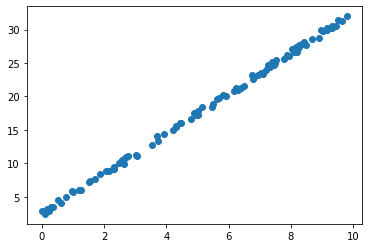

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# dataset generation
data = np.zeros((100,2))

for i in range(len(data)):
  data[i][0] = 10*np.random.rand(1)
  data[i][1] = 3*data[i,0] + 2 + np.random.rand(1)

plt.scatter(data[:,0], data[:,1])
plt.show()


iteration: 0 loss= 111475.95337900869 a= 5.948148365138074 c= 19.34201598958134
iteration: 100 loss= 2551.888114505481 a= 1.4936752168564842 c= 12.799250294656346
iteration: 200 loss= 983.7547515681774 a= 2.0666446397850686 c= 8.883732942548138
iteration: 300 loss= 382.1514519452448 a= 2.4215356950342137 c= 6.458503900074054
iteration: 400 loss= 151.35059108015435 a= 2.6413513711519765 c= 4.9563432966245795
iteration: 500 loss= 62.805469387081686 a= 2.7775028203148406 c= 4.02592128738881
iteration: 600 loss= 28.83575824192347 a= 2.8618335533932986 c= 3.4496279714261817
iteration: 700 loss= 15.80351825827477 a= 2.9140670961523125 c= 3.092678132829826
iteration: 800 loss= 10.803791346683985 a= 2.9464199868430576 c= 2.871587268603617
iteration: 900 loss= 8.885681396142255 a= 2.9664590169520513 c= 2.7346459817367905
iteration: 1000 loss= 8.149812048190853 a= 2.978870975176979 c= 2.6498260317385123


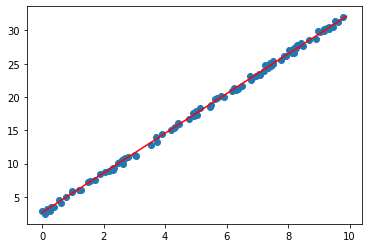

In [11]:
# y = 3x + 2 --> y = ax + c : find a and c
# error = true - pred
# MSE loss = (true - pred)**2
def loss_function (a,c):
  return sum((y-a*x-c)**2 for x, y in data)

def a_grad_loss(a,c):
  return sum(2*(y-a*x-c)*(-x) for x,y in data )

def c_grad_loss(a,c):
  return sum(2*(y-a*x-c)*(-1) for x,y in data )  

a = 20.00001
c = 20.00001
lr= 0.0001 # learning rate

for i in range(1000+1):
  a = a - lr*a_grad_loss(a,c)
  c = c - lr*c_grad_loss(a,c)
  if i%100 == 0:
    print('iteration:', i, 'loss=', loss_function(a,c), 'a=', a, 'c=', c)

x_coor = []
y_coor = []
for i in range(100):
  x_coor.append (i*0.1)
  y_coor.append (a*x_coor[i] + c) 

plt.plot(x_coor, y_coor, 'r')
plt.scatter(data[:,0], data[:,1])
plt.show()

iteration: 0 loss= 111338.30476856642 a= 5.944553257867916 c= 19.342291740415927
iteration: 100 loss= 2568.9730142125327 a= 1.483844816481461 c= 12.832844170871995
iteration: 200 loss= 1000.7580608953351 a= 2.053789344806084 c= 8.93799812657902
iteration: 300 loss= 395.211187162403 a= 2.406806813097447 c= 6.525572668293426
iteration: 400 loss= 160.47418267787052 a= 2.6254620097446835 c= 5.031342466226258
iteration: 500 loss= 68.91807150661053 a= 2.760894670491605 c= 4.105832461719696
iteration: 600 loss= 32.86356453206275 a= 2.844780193809775 c= 3.5325815882888594
iteration: 700 loss= 18.455691601409995 a= 2.896737978464931 c= 3.17751620564675
iteration: 800 loss= 12.57155878459117 a= 2.9289200675726335 c= 2.957592553029766
iteration: 900 loss= 10.093245104321856 a= 2.9488533050308883 c= 2.8213742243926774
iteration: 1000 loss= 9.005629745673874 a= 2.961199736433692 c= 2.737002066892193


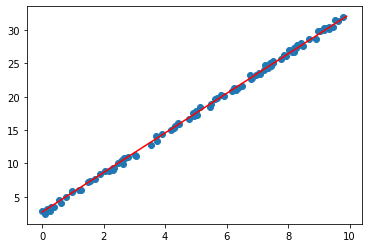

In [13]:
# y = 3x + 2 --> y = ax + c : find a and c
# error = true - pred
# MSE loss = (true - pred)**2

def loss_function (a,c):
  return sum((y-a*x-c)**2 for x, y in data)

def a_grad_loss(a,c):
  a_del = a + delta
  return  (loss_function(a_del,c) - loss_function(a,c))/delta 
  
def c_grad_loss(a,c):
  c_del = c + delta
  return  (loss_function(a,c_del) - loss_function(a,c))/delta 
  
a = 20.00001
c = 20.00001
lr= 0.0001 # learning rate
delta = 0.01

for i in range(1000+1):
  a = a - lr*a_grad_loss(a, c)
  c = c - lr*c_grad_loss(a, c)
  if i%100 == 0:
    print('iteration:', i, 'loss=', loss_function(a,c), 'a=', a, 'c=', c)

x_coor = []
y_coor = []
for i in range(100):
  x_coor.append (i*0.1)
  y_coor.append (a*x_coor[i] + c) 

plt.plot(x_coor, y_coor, 'r')
plt.scatter(data[:,0], data[:,1])
plt.show()

iteration:  0 loss= tf.Tensor(13604.736, shape=(), dtype=float32) a= 19.860474 c= 19.979733
iteration:  1000 loss= tf.Tensor(47.275043, shape=(), dtype=float32) a= 0.9609642 c= 16.524614
iteration:  2000 loss= tf.Tensor(43.02942, shape=(), dtype=float32) a= 1.0432674 c= 15.878608
iteration:  3000 loss= tf.Tensor(39.170113, shape=(), dtype=float32) a= 1.1331922 c= 15.263967
iteration:  4000 loss= tf.Tensor(35.657562, shape=(), dtype=float32) a= 1.2189897 c= 14.677589
iteration:  5000 loss= tf.Tensor(32.460655, shape=(), dtype=float32) a= 1.3008423 c= 14.118182
iteration:  6000 loss= tf.Tensor(29.550953, shape=(), dtype=float32) a= 1.3789302 c= 13.584491
iteration:  7000 loss= tf.Tensor(26.902702, shape=(), dtype=float32) a= 1.4534283 c= 13.075342
iteration:  8000 loss= tf.Tensor(24.492397, shape=(), dtype=float32) a= 1.5245004 c= 12.589605
iteration:  9000 loss= tf.Tensor(22.298653, shape=(), dtype=float32) a= 1.592305 c= 12.126203
iteration:  10000 loss= tf.Tensor(20.30203, shape=(), d

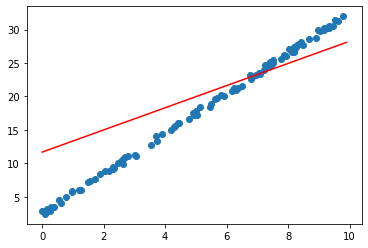

In [14]:
import tensorflow as tf

a = tf.Variable(initial_value=20.001)
c = tf.Variable(initial_value=20.001)

x = data[:,0]
y = data[:,1]

def loss_function(x,y):
  pred = a*x+c
  return tf.reduce_mean(tf.math.square(y - pred))

optimizer = tf.optimizers.SGD(0.0001)

def train():
  with tf.GradientTape() as g:
    loss = loss_function(x,y)
  gradients = g.gradient(loss, [a,c])
  optimizer.apply_gradients(zip(gradients, [a,c]))

for i in range(10000+1):
  x = data[:,0]
  y = data[:,1]

  train()
  
  if i%1000 == 0:
    loss = loss_function(x,y)
    print('iteration: ', i, 'loss=', loss, 'a=', a.numpy(), 'c=', c.numpy())

x_coor = []
y_coor = []
a = a.numpy()
c = c.numpy()
for i in range(100):
  x_coor.append (i*0.1)
  y_coor.append (a*x_coor[i] + c) 

plt.plot(x_coor, y_coor, 'r')
plt.scatter(data[:,0], data[:,1])
plt.show()


iteration: 0 loss= tensor(281.4087, grad_fn=<MseLossBackward>) param= tensor([[0.5227]]) tensor([0.4786])
iteration: 100 loss= tensor(64.9910, grad_fn=<MseLossBackward>) param= tensor([[1.9377]]) tensor([0.6935])
iteration: 200 loss= tensor(15.4274, grad_fn=<MseLossBackward>) param= tensor([[2.6143]]) tensor([0.8003])
iteration: 300 loss= tensor(4.0730, grad_fn=<MseLossBackward>) param= tensor([[2.9375]]) tensor([0.8554])
iteration: 400 loss= tensor(1.4684, grad_fn=<MseLossBackward>) param= tensor([[3.0915]]) tensor([0.8857])
iteration: 500 loss= tensor(0.8674, grad_fn=<MseLossBackward>) param= tensor([[3.1647]]) tensor([0.9041])
iteration: 600 loss= tensor(0.7254, grad_fn=<MseLossBackward>) param= tensor([[3.1991]]) tensor([0.9168])
iteration: 700 loss= tensor(0.6885, grad_fn=<MseLossBackward>) param= tensor([[3.2151]]) tensor([0.9267])
iteration: 800 loss= tensor(0.6757, grad_fn=<MseLossBackward>) param= tensor([[3.2221]]) tensor([0.9353])
iteration: 900 loss= tensor(0.6685, grad_fn=

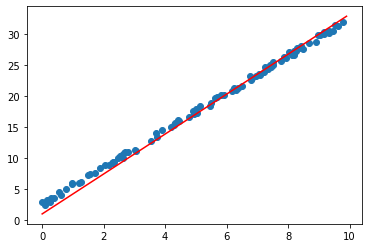

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Linear_Regression(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1) # 단일 선형 회귀이므로 input_dim=1, output_dim=1.

    def forward(self, x):
        return self.linear(x)

x = []
y = []

for i in range(len(data)):

  lx = []
  ly = []
  for j in range(1):
    lx.append(data[i,0])
    ly.append(data[i,1])
  x.append (lx)
  y.append (ly)

in_x = torch.FloatTensor(x)
in_y = torch.FloatTensor(y)

model = Linear_Regression()
optimizer = torch.optim.SGD(model.parameters(), lr=0.0001) 
weight = []

for i in range(1000+1):
  pred = model(in_x)
  loss = F.mse_loss(pred, in_y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if i%100 == 0:
    for param in model.parameters():
      weight.append (param.data)
    print('iteration:', i, 'loss=', loss, 'param=', weight[0], weight[1]) 

x_coor = []
y_coor = []
a = weight[0]
c = weight[1]
for i in range(100):
  x_coor.append (i*0.1)
  y_coor.append (a*x_coor[i] + c) 

plt.plot(x_coor, y_coor, 'r')
plt.scatter(data[:,0], data[:,1])
plt.show()